In [1]:
import sys

import numpy as np

from matplotlib import pyplot as plt, colors, cm, scale as mscale
from matplotlib.collections import LineCollection
import cmasher

from tqdm import tqdm

sys.path.append('..')
from sketched.sketched import DiscreteSpectrum, SketchedEquivalence

In [2]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{bm}')
plt.rcParams['figure.figsize'] = [6, 2]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = plt.rcParams['xtick.labelsize']
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['patch.linewidth'] = 0.7
plt.rcParams['hatch.linewidth'] = 0.7
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = plt.rcParams['xtick.major.width']
plt.rcParams['ytick.minor.width'] = plt.rcParams['xtick.minor.width']

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
r = 0.5

p = 1000
n = int(r * p)
spec_vec = np.linalg.eigvalsh((lambda X: X.T @ X / X.shape[0])(np.random.randn(n, p)))
print(n)
spec_vec[:-n] = 0
spec_vec *= r

spectrum1 = DiscreteSpectrum([1, 0], [r, 1 - r])
spectrum2 = DiscreteSpectrum(spec_vec)

psi1 = DiscreteSpectrum([1, 1])
psi2 = DiscreteSpectrum(np.ones_like(spec_vec))

500


In [4]:
spectrum = DiscreteSpectrum([0.001, 1])
psi_spectrum = DiscreteSpectrum([1, 1])
spectrum = spectrum1
psi = psi1

alphas = np.linspace(0.25, 0.75, 501)
lamdas = np.logspace(-8, -1, 8)

mus = np.zeros((len(lamdas), len(alphas)))
mu_primes = np.zeros_like(mus)
trs = np.zeros_like(mus)

for i, lamda in enumerate(lamdas):
    for j, alpha in enumerate(alphas):
        se = SketchedEquivalence(spectrum, alpha)
        mu = se.get_mu_from_lamda(lamda)
        mu_prime = se.get_mu_prime(psi, lamda=lamda)
        psi_plus_mu_prime = DiscreteSpectrum(psi.eigvals + mu_prime, psi.weights)

        mus[i, j] = mu
        mu_primes[i, j] = mu_prime
        trs[i, j] = spectrum.trace_resolvent_poly_other(psi_plus_mu_prime, -mu, 0, 2)

/tmp/ipykernel_28628/702955494.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


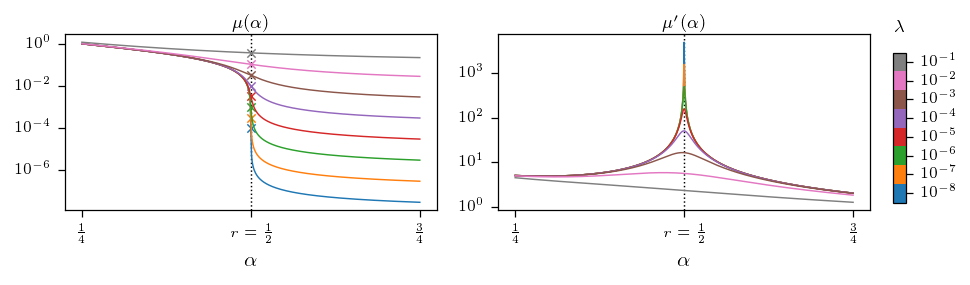

In [5]:
for i, lamda in enumerate(lamdas):
    
    plt.subplot(1, 2, 1)
    plt.plot(alphas, mus[i, :], color=color_cycle[i])
    r_i = np.argmin(np.abs(alphas - r))
    plt.scatter([r], mus[i, r_i], marker='x', color=color_cycle[i])
    
    plt.subplot(1, 2, 2)
    plt.plot(alphas, mu_primes[i, :])

ticks_values = [1/4, 1/2, 3/4]
ticks_labels = [r'$\frac{1}{4}$', r'$r = \frac{1}{2}$', r'$\frac{3}{4}$']

plt.subplot(1, 2, 1)
plt.xlabel(r'$\alpha$')
plt.xticks(ticks_values, ticks_labels)

plt.yscale('log')
plt.title(r'$\mu(\alpha)$')

ylim = plt.ylim()
plt.plot([r, r], ylim, ':k', zorder=-10)
plt.ylim(ylim)

plt.subplot(1, 2, 2)
plt.xlabel(r'$\alpha$')
plt.xticks(ticks_values, ticks_labels)

plt.yscale('log')
plt.minorticks_off()
plt.title(r"$\mu'(\alpha)$")

ylim = plt.ylim()
plt.plot([r, r], ylim, ':k', zorder=-10)
plt.ylim(ylim)
#plt.legend(loc=(1.0, 0))

fig = plt.gcf()
ax = fig.add_axes([1.0, 0.3, 0.015, 0.5])
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(0, 1), cmap='tab10'), cax=ax)
ax.set_ylim(0, len(lamdas) / 10)
ax.set_yticks((np.arange(len(lamdas)) + 0.5) / 10, [r'$10^{%d}$' % round(np.log10(lamda)) for lamda in lamdas])
ax.set_title(r'$\lambda$', pad=10)

plt.tight_layout()
plt.savefig('mu_prime_peak.pdf', bbox_inches='tight')
plt.show()

In [6]:
psi_spec = DiscreteSpectrum(spectrum.eigvals)

alphas = np.linspace(0.1, 2, 200)
mus_range = sorted([SketchedEquivalence(spectrum, alpha).mu_0 for alpha in alphas[[0, -1]]])
mus = np.linspace(mus_range[0], mus_range[1], 501)

mu_primes = np.zeros((2, len(alphas), len(mus)))

for k, psi_ in enumerate([psi, psi_spec]):
    for i, alpha in enumerate(tqdm(alphas)):
        se = SketchedEquivalence(spectrum, alpha)
        mus_ = [mu if mu > se.mu_0 else None for mu in mus]
        mu_primes[k, i, :] = [se._get_mu_prime(psi_, mu=mu) for mu in mus_]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 76.75it/s]


/tmp/ipykernel_28628/3028811763.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=0.6)


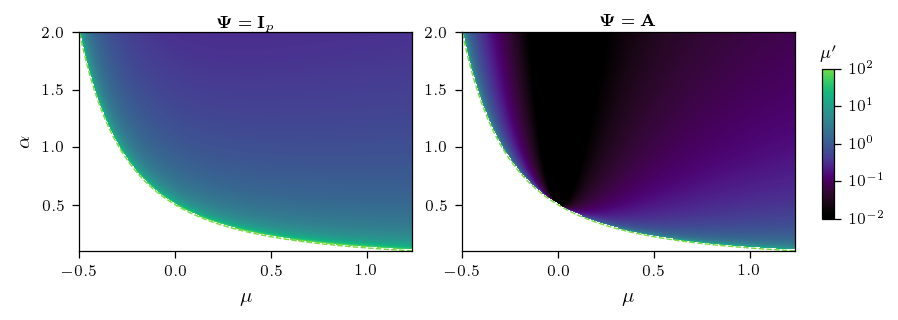

In [7]:
cmap = cmasher.lavender
vmin, vmax = 0.01, 100

alpha_diff = alphas[1] - alphas[0]
alphas_plt = np.concatenate((alphas, [alphas[-1] + alpha_diff])) - alpha_diff / 2
mu_diff = mus[1] - mus[0]
mus_plt = np.concatenate((mus, [mus[-1] + mu_diff])) - mu_diff / 2

extent = mus_range + [alphas[0], alphas[-1]]

fig = plt.figure(figsize=(5.5, 2))

for k, title in enumerate([r'${\bm \Psi} = \mathbf{I}_p$', r'${\bm \Psi} = \mathbf{A}$']):
    plt.subplot(1, 2, k + 1)
    plt.imshow(mu_primes[k, :, :], aspect=0.6, origin='lower', extent=extent, norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmap)
    plt.plot([SketchedEquivalence(spectrum, alpha).mu_0 for alpha in alphas], alphas, '--', color=cmap.colors[-1])
    plt.title(title)
    if k == 0:
        plt.ylabel(r'$\alpha$')
    plt.xlabel(r'$\mu$')
    plt.xticks([-0.5, 0, 0.5, 1])

ax = fig.add_axes([1.005, 0.3, 0.015, 0.5])
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap=cmap), cax=ax)
ax.minorticks_off()
ax.set_title(r"$\mu'$", pad=5)

plt.tight_layout(w_pad=0.6)
plt.savefig('mu_prime.pdf', bbox_inches='tight')
plt.show()